C:\Anaconda\lib\site-packages\pandas\core\frame.py:1549: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
C:\Anaconda\lib\site-packages\pandas\core\frame.py:1549: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, U

[18:19:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix, without normalization
[[33082 19179]
 [ 6442 28557]]
Normalized confusion matrix
[[0.63 0.37]
 [0.18 0.82]]


,id,recall,pre,acc,roc,f1,tnr
0,0007A88B9A54,0.613372,0.539642,0.725198,0.693478,0.574150,0.773585
1,0007A88B9C97,0.902098,0.442539,0.566339,0.643284,0.593786,0.384470
2,0007A88BE35D,0.971193,0.766234,0.792105,0.722823,0.856624,0.474453
3,0007A88C5912,0.703526,0.768827,0.745790,0.745824,0.734728,0.788122
4,0007A88DC042,0.848185,0.823718,0.735602,0.575991,0.835772,0.303797


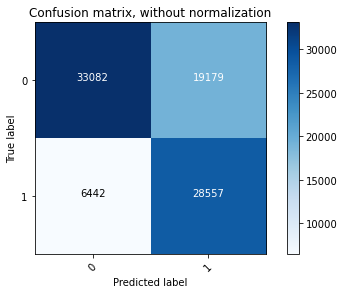

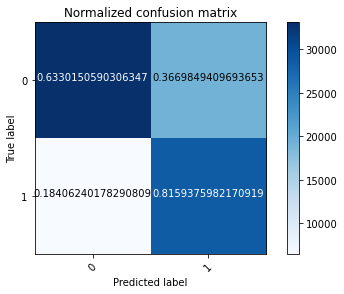

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import itertools
dfpre=pd.read_csv(r'C:\luyan\paper_code\data\hourly_for_pre_fs.csv')



dfpre['thermal']=dfpre['thermal_type'].astype(str)
dfpre['schedule']=dfpre['schedule_type'].astype(str)
dfpre['daytype'].replace(['work','rest'],['1','0'],inplace=True)
dfpre['workday']=dfpre['daytype'].astype(str)
dfpre['hour']=dfpre['hour'].astype(str)





dfselx0=dfpre[['thermal','schedule','workday','tout','hour','id','state']]



id_total=dfpre['id'].drop_duplicates()
id_train_70=dfpre['id'].drop_duplicates().sample(frac=0.7,random_state=123)
id_test_30=pd.concat([id_total, id_train_70, id_train_70]).drop_duplicates(keep=False)
dfselxtrain0=pd.merge(id_train_70,dfselx0,on='id')
dfselxtest0=pd.merge(id_test_30,dfselx0,on='id')

#%%
df_id_train=pd.DataFrame()
df_id_train['id']=id_train_70
df_id_train['type']='train'

df_id_test=pd.DataFrame()
df_id_test['id']=id_test_30
df_id_test['type']='test'


dfytrain=dfselxtrain0['state'].values
y_train=np.array(dfytrain)

dfytest=dfselxtest0['state'].values
y_test=np.array(dfytest)

dfselxtrain=dfselxtrain0[['thermal','schedule','workday','tout','hour']]
dfselxtest=dfselxtest0[['thermal','schedule','workday','tout','hour']]

dfxtrain=dfselxtrain
dfxtrain=dfxtrain.to_dict(orient='record')
v = DictVectorizer(sparse=False)
dfxtrain= v.fit_transform(dfxtrain)
scaler=StandardScaler().fit(dfxtrain)
x_train=scaler.transform(dfxtrain)


dfxtest=dfselxtest
dfxtest=dfxtest.to_dict(orient='record')

dfxtest= v.transform(dfxtest)
x_test=scaler.transform(dfxtest)




column=v.get_feature_names()


rus = RandomUnderSampler(random_state=123)
x_resampled, y_resampled = rus.fit_sample(x_train, y_train)

xgb0= XGBClassifier(n_estimators=500,learning_rate=0.05,max_depth=7,min_child_weight=5,subsample=0.9, colsample_bytree=0.7, gamma=0.5, reg_alpha=10, reg_lambda= 10,seed=0)

xgb1=xgb0.fit(x_resampled, y_resampled )
ypre=xgb1.predict(x_test)
scorebalance=balanced_accuracy_score(y_test,ypre)

a=classification_report(y_test,ypre)
yprepro=xgb1.predict_proba(x_test)[:,1]
roc=roc_auc_score(y_test, yprepro)
conmax=confusion_matrix(y_test,ypre)




precision0, recall0, thresholds = precision_recall_curve(y_test, yprepro)

            




fpr, tpr, thresholds2 = roc_curve(y_test, yprepro)
f1=f1_score(y_test,ypre)



scoretest0=xgb1.score(x_test,y_test)
scoretest=accuracy_score(y_test,ypre)
recall=recall_score(y_test,ypre)
precision=precision_score(y_test,ypre)

from sklearn.metrics import confusion_matrix

c=confusion_matrix(y_test,ypre).ravel()
tnr=c[0]/(c[0]+c[1])  







def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, ypre,labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')


feature_importance = xgb0.feature_importances_
feature_importancere = 100.0 * (feature_importance / feature_importance.max())


dfxgb=pd.DataFrame()
dfxgb['tpr']=tpr
dfxgb['fpr']=fpr
dfxgb['threshold']=thresholds2 
dfxgb['tpr-fpr']=dfxgb['tpr']-dfxgb['fpr']

dfcom=pd.DataFrame(x_test)


dfcom['true']=y_test
dfcom['pre']=ypre
true=dfcom[dfcom['true']==1]
pre=dfcom[dfcom['pre']==1]
dfcom['prepro']=yprepro



dfselxtest0['statepre']=ypre
listrecall=[]
listpre=[]
listf1=[]
listroc=[]
listid=[]
listacc=[]
listtnr=[]
for nameid,dfi in dfselxtest0.groupby('id'):
    yprei=dfi['statepre']
    ytesti=dfi['state']
    recalli=recall_score(ytesti,yprei)
    prei=precision_score(ytesti,yprei)
    c=confusion_matrix(ytesti,yprei).ravel()
    tnri=c[0]/(c[0]+c[1])
    acci=accuracy_score(ytesti,yprei)
    f1i=f1_score(ytesti,yprei)
    roci=roc_auc_score(ytesti,yprei)
    listrecall.append(recalli)
    listpre.append(prei)
    listf1.append(f1i)
    listroc.append(roci)
    listid.append(nameid)
    listacc.append(acci)
    listtnr.append(tnri)
dfresulttest=pd.DataFrame()
dfresulttest['id']=listid
dfresulttest['recall']=listrecall
dfresulttest['pre']=listpre
dfresulttest['acc']=listacc
dfresulttest['roc']=listroc
dfresulttest['f1']=listf1
dfresulttest['tnr']=listtnr
#dfresulttest.to_csv(r'C:\luyan\paper_code\data\xgb_result_fs.csv',index=False)
dfresulttest.head(5)